In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot as plt 

%matplotlib inline

#### Uncompress Dataset File

In [3]:
if not os.path.exists('./fer2013'):
    import tarfile
    try:
        file = tarfile.open('./fer2013.tar.gz', mode='r:gz')
        try: 
            file.extractall()
        finally: 
            file.close()
    except FileNotFoundError:
        print('File Not Found')
    else:
        file.close()

In [4]:
DATASET = os.path.join('fer2013', 'fer2013.csv')

In [5]:
EMOTION_MAP = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

In [6]:
df = pd.read_csv(DATASET)

In [7]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [8]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
img = np.fromstring(df.pixels[0], dtype=np.uint8, sep=' ')

In [10]:
img = img.reshape(48, 48)

In [11]:
from functools import partial

In [12]:
text_annotation = partial(plt.text, x=40, y=46, fontdict={'color': 'red', 'fontsize': 16, 'ha': 'center', 
                                                          'va': 'center', 
                                                          'bbox': dict(boxstyle="round", fc="white", 
                                                                       ec="black", pad=0.2)})

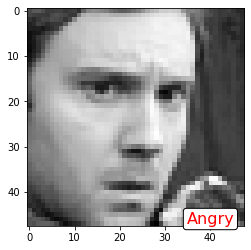

In [13]:
plt.imshow(img, cmap=plt.gray())
text_annotation(s=EMOTION_MAP[df.emotion[0]])
plt.show()

In [14]:
df.shape

(35887, 3)

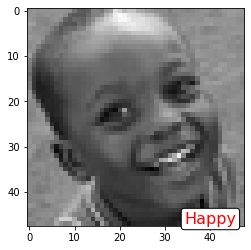

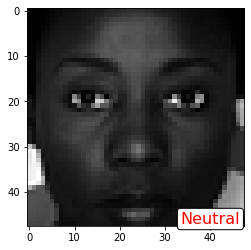

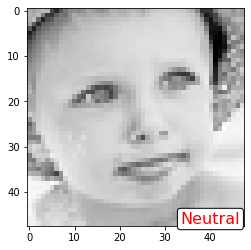

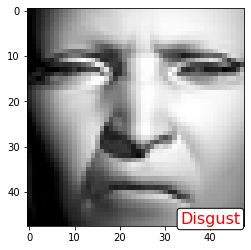

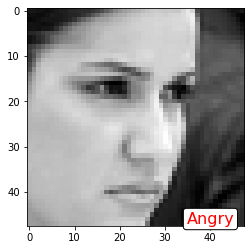

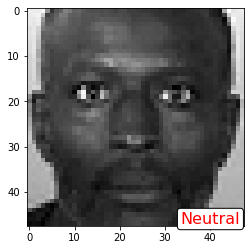

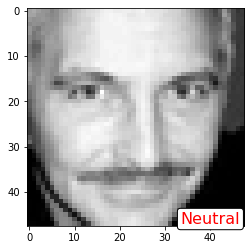

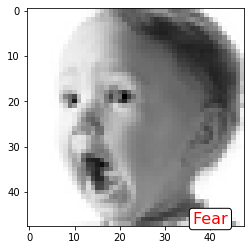

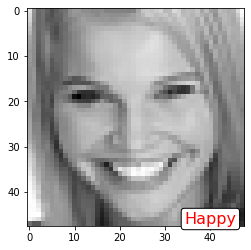

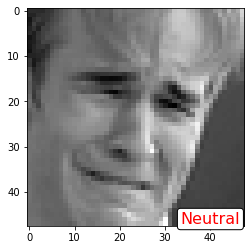

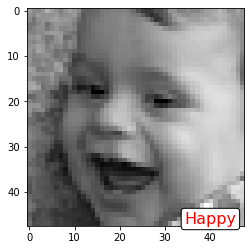

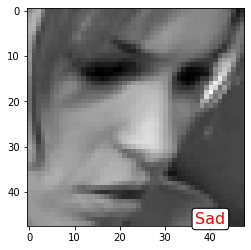

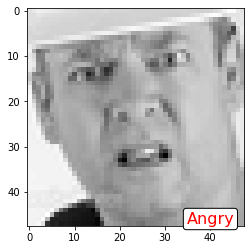

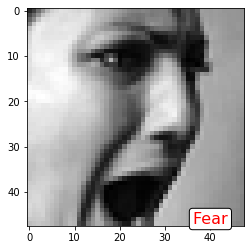

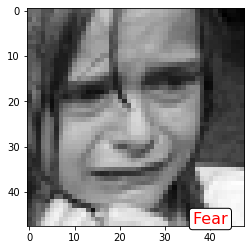

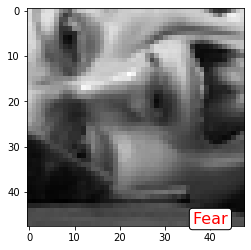

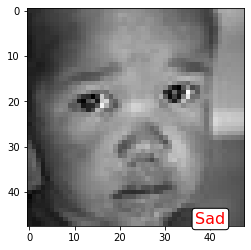

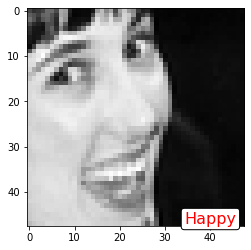

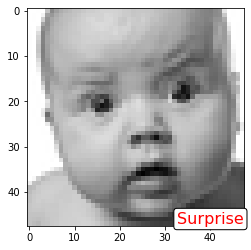

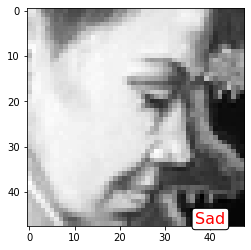

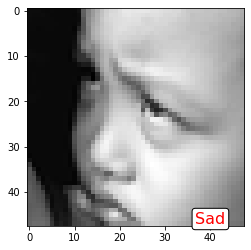

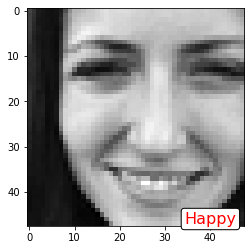

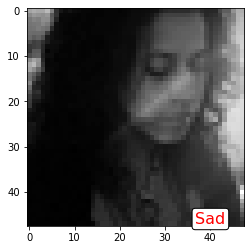

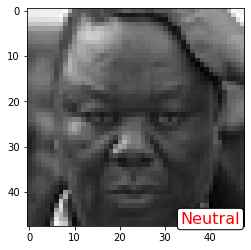

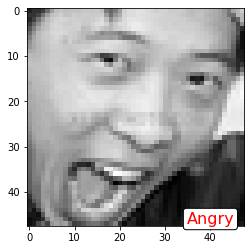

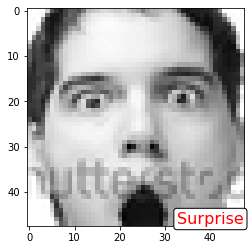

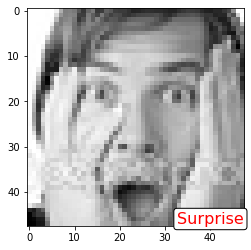

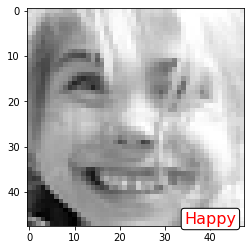

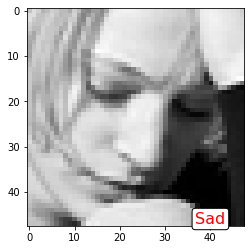

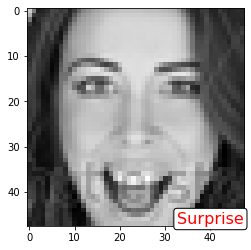

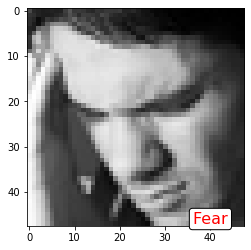

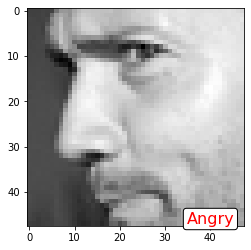

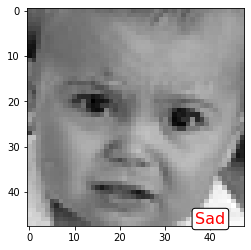

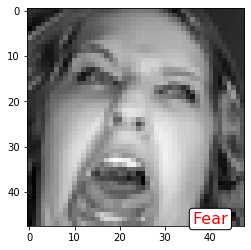

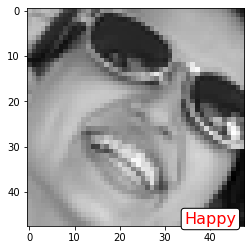

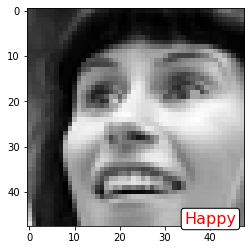

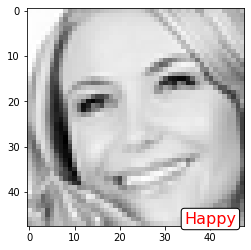

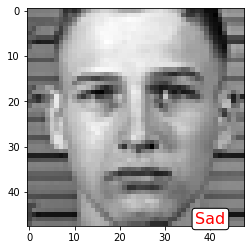

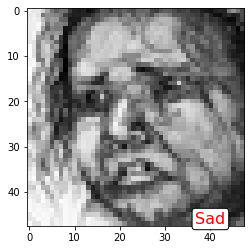

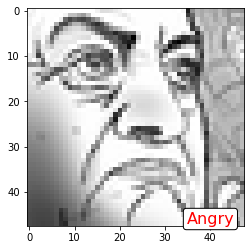

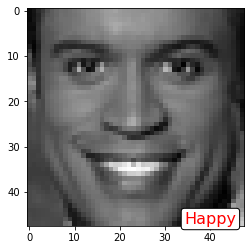

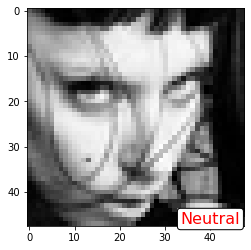

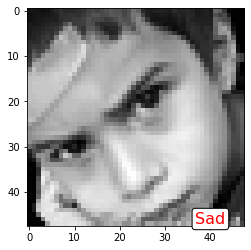

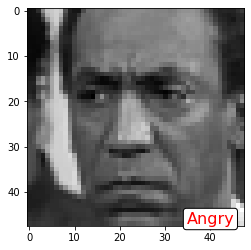

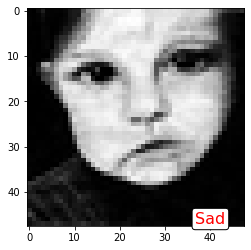

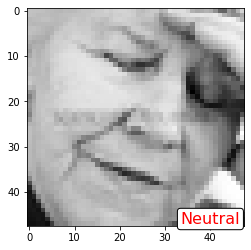

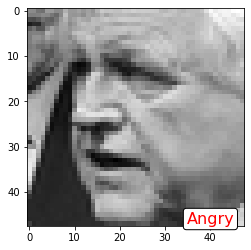

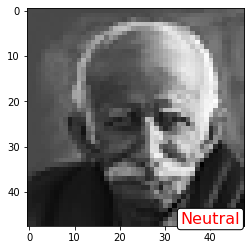

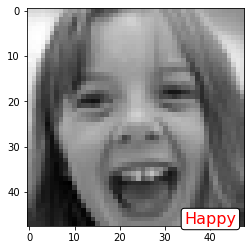

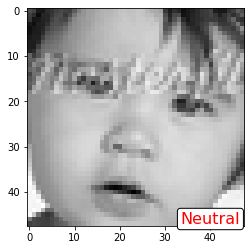

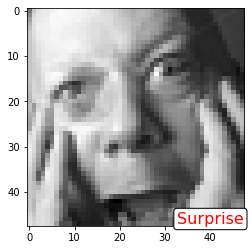

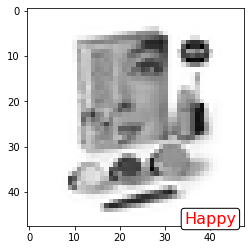

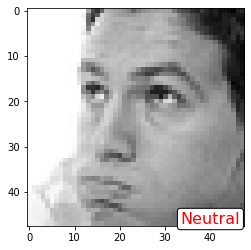

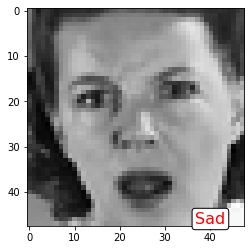

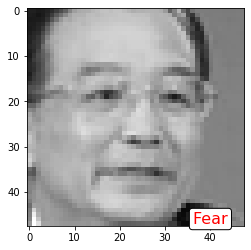

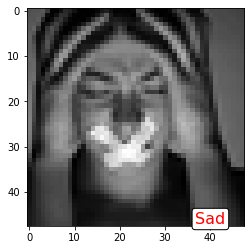

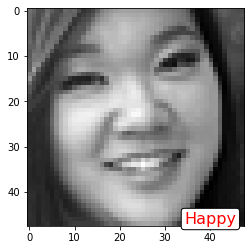

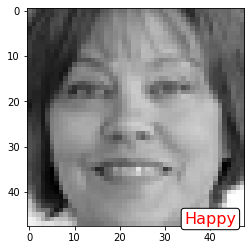

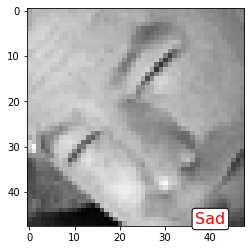

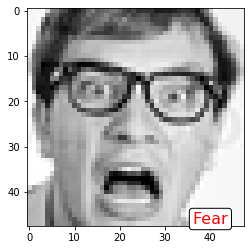

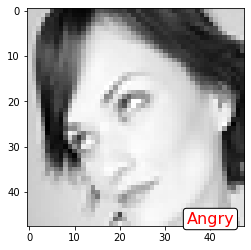

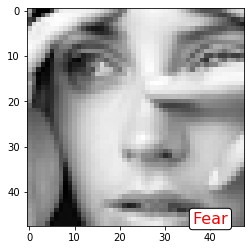

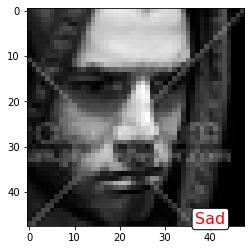

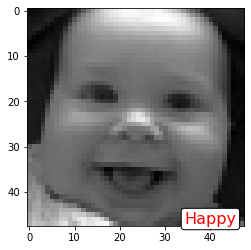

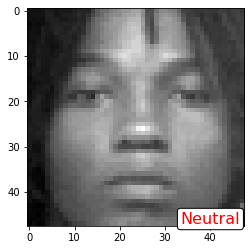

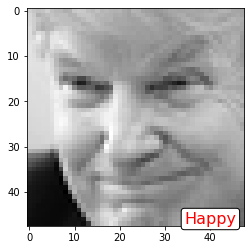

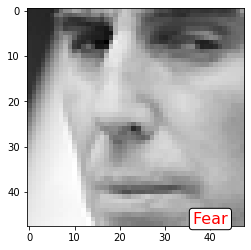

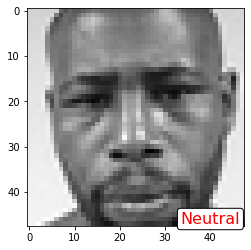

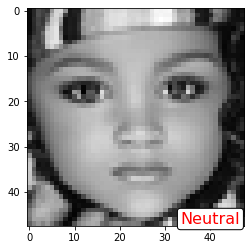

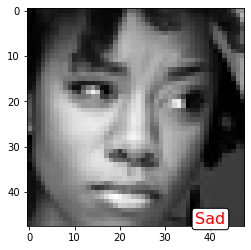

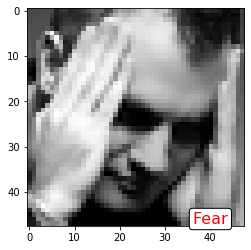

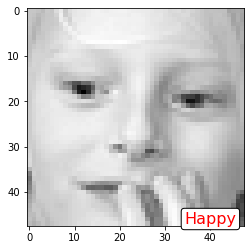

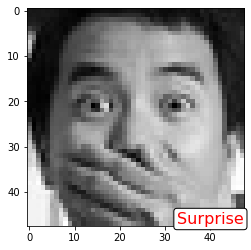

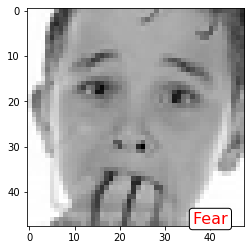

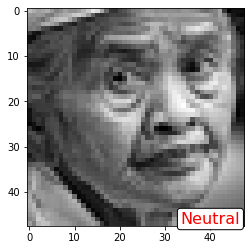

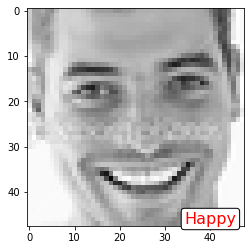

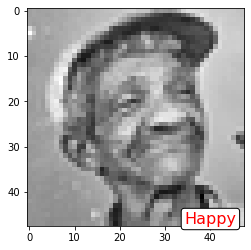

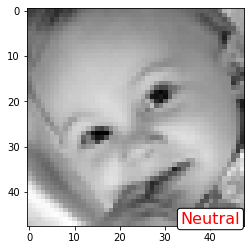

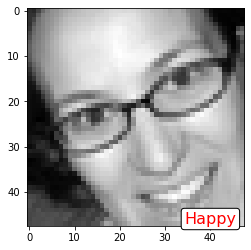

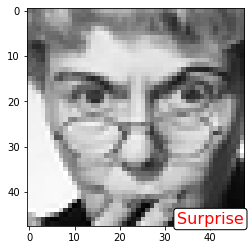

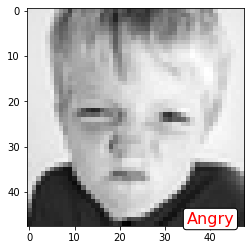

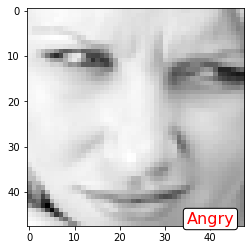

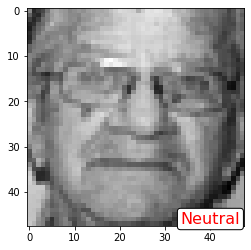

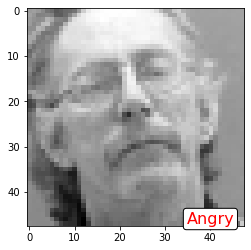

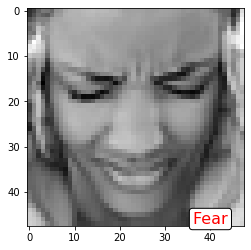

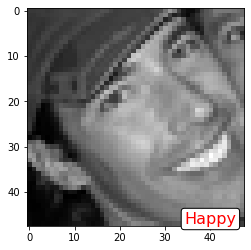

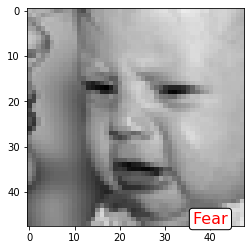

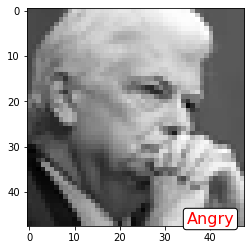

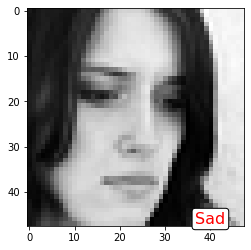

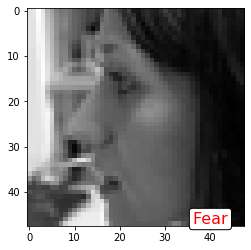

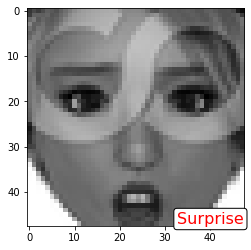

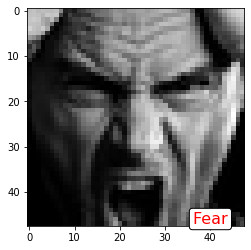

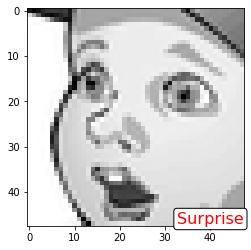

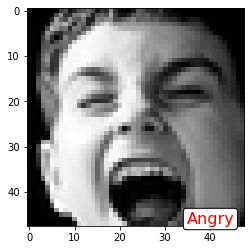

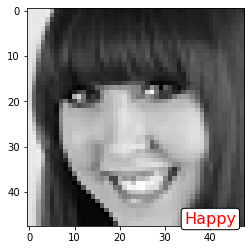

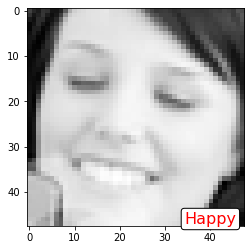

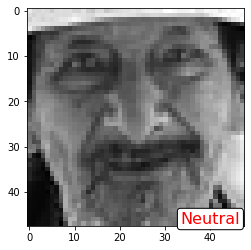

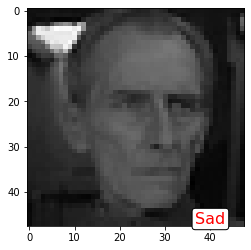

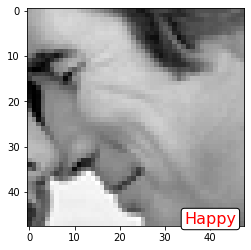

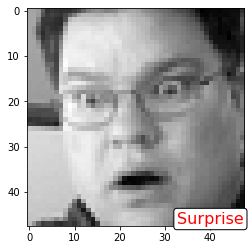

In [15]:
sample = np.random.choice(np.arange(df.shape[0]), size=100, replace=False)

for index in sample:
    img = np.fromstring(df.pixels[index], dtype=np.uint8, sep=' ').reshape(48, 48)
    plt.imshow(img, cmap=plt.gray())
    text_annotation(s=EMOTION_MAP[df.emotion[index]])
    plt.show()

In [16]:
emo_count = df.emotion.value_counts()
emotions_count = pd.Series(emo_count.values, index=list(map(lambda v: EMOTION_MAP[v], emo_count.index.values)))

In [17]:
emotions_count

Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
dtype: int64